In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('seeds_dataset.txt', delimiter='\t', header=0 )

In [4]:
df.columns = ['area','perimeter' ,'compactness','length_of_kernel','width_of_kernel','asymmetry_coefficient','length_of_kernel_groove','catorogy']

In [5]:
df

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,catorogy
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
...,...,...,...,...,...,...,...,...
204,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
205,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
206,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
207,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [6]:
df.isnull().sum()

area                       0
perimeter                  0
compactness                0
length_of_kernel           0
width_of_kernel            0
asymmetry_coefficient      0
length_of_kernel_groove    0
catorogy                   0
dtype: int64

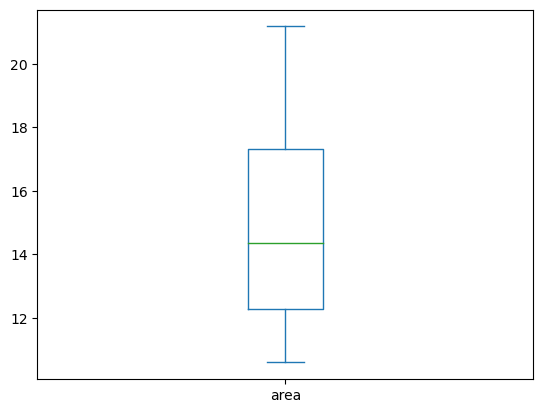

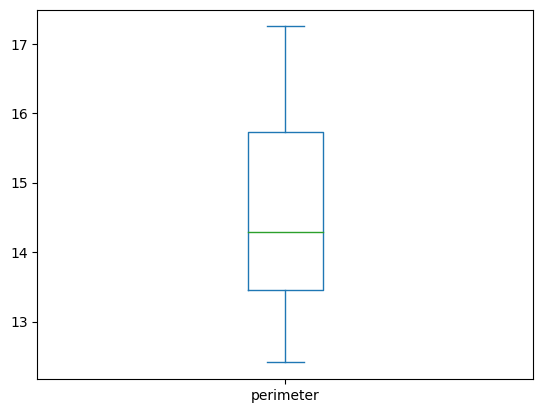

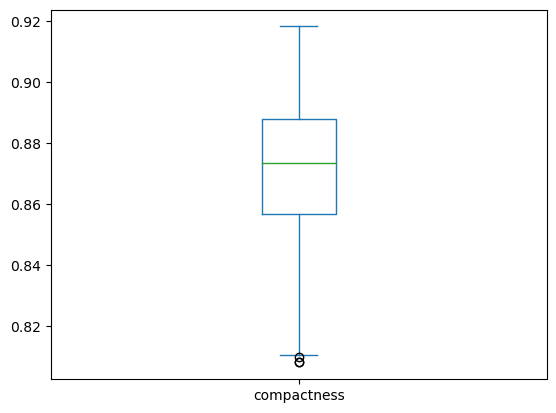

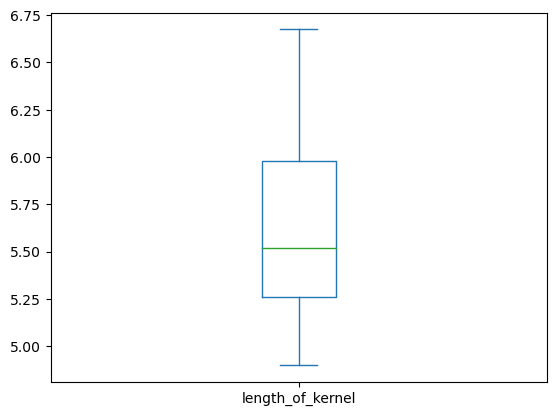

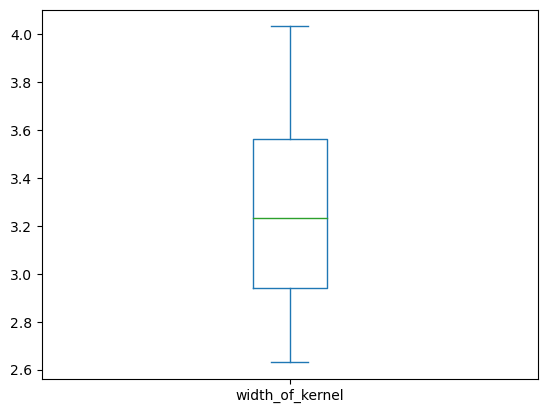

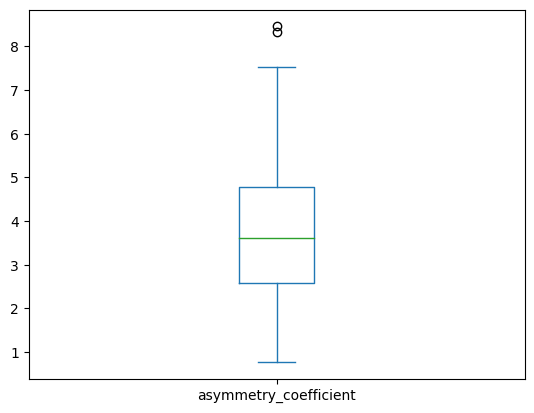

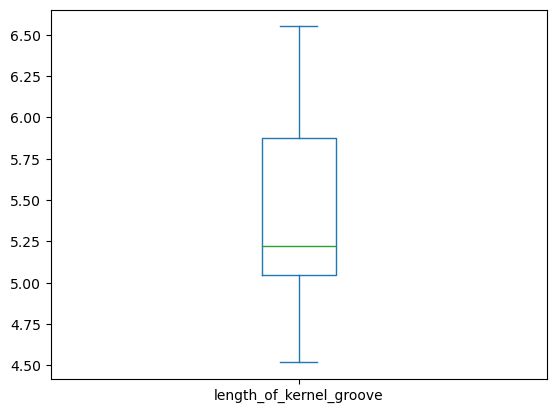

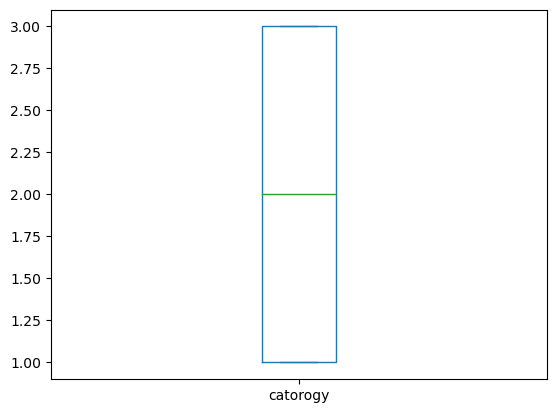

In [7]:
cols = df.columns
for col in cols:
    df[col].plot(kind='box')
    plt.show()
    

In [8]:
df.drop(['area','perimeter'],axis=1,inplace=True)

In [9]:
df.corr()

,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,catorogy
compactness,1.000000,0.367997,0.761671,-0.332244,0.226905,-0.532923
length_of_kernel,0.367997,1.000000,0.860441,-0.170562,0.933900,-0.256465
width_of_kernel,0.761671,0.860441,1.000000,-0.257981,0.749691,-0.424178
asymmetry_coefficient,-0.332244,-0.170562,-0.257981,1.000000,-0.012924,0.574895
length_of_kernel_groove,0.226905,0.933900,0.749691,-0.012924,1.000000,0.022141
catorogy,-0.532923,-0.256465,-0.424178,0.574895,0.022141,1.000000


In [10]:
df.to_csv('wheat.csv')

In [11]:
df.head()

,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,catorogy
0,0.8811,5.554,3.333,1.018,4.956,1
1,0.9050,5.291,3.337,2.699,4.825,1
2,0.8955,5.324,3.379,2.259,4.805,1
3,0.9034,5.658,3.562,1.355,5.175,1
4,0.8951,5.386,3.312,2.462,4.956,1


In [12]:
df

,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,catorogy
0,0.8811,5.554,3.333,1.018,4.956,1
1,0.9050,5.291,3.337,2.699,4.825,1
2,0.8955,5.324,3.379,2.259,4.805,1
3,0.9034,5.658,3.562,1.355,5.175,1
4,0.8951,5.386,3.312,2.462,4.956,1
...,...,...,...,...,...,...
204,0.8783,5.137,2.981,3.631,4.870,3
205,0.8511,5.140,2.795,4.325,5.003,3
206,0.8883,5.236,3.232,8.315,5.056,3
207,0.8521,5.175,2.836,3.598,5.044,3


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline



In [14]:
x=df.drop('catorogy',axis =1)
y=df['catorogy']

In [15]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
from sklearn.ensemble import RandomForestClassifier

In [16]:
from sklearn.model_selection import train_test_split
scores=[]
for i in range(1000):
    X_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=i)
    X=s.fit_transform(x)
    X_trains=s.fit_transform(X_train)
    X_tests=s.transform(x_test)
    model=RandomForestClassifier(n_estimators=100)
    model.fit(X_train,y_train)
    y_pred=model.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [17]:
from sklearn.model_selection import train_test_split

X_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=16 , stratify = y)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(x_test)

In [18]:
X_trains[:5]

array([[ 0.893049  ,  1.09773495,  1.34556424, -0.99845311,  0.80375654],
       [-2.5995127 , -0.79715196, -1.63691554,  1.02240286, -0.4596426 ],
       [-0.64928664, -1.40744726, -1.23237706,  1.84939719, -0.741781  ],
       [-0.22440079,  0.17200612, -0.12716735, -1.20554456,  0.06729234],
       [-2.17887571, -0.48857568, -1.43861237,  0.82765461, -0.11319325]])

In [19]:
y_train[:5]

109    2
173    3
163    3
54     1
185    3
Name: catorogy, dtype: int64

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_trains,y_train)
y_pred = rf.predict(X_tests)
r2_score(y_test,y_pred)


0.5714285714285714

In [21]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_tests)
accuracy_score(y_test,y_pred)

0.9285714285714286

In [22]:
df[df['catorogy']==1]

,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,catorogy
0,0.8811,5.554,3.333,1.018,4.956,1
1,0.9050,5.291,3.337,2.699,4.825,1
2,0.8955,5.324,3.379,2.259,4.805,1
3,0.9034,5.658,3.562,1.355,5.175,1
4,0.8951,5.386,3.312,2.462,4.956,1
...,...,...,...,...,...,...
64,0.8879,5.139,3.119,2.352,4.607,1
65,0.8726,5.630,3.190,1.313,5.150,1
66,0.8625,5.609,3.158,2.217,5.132,1
67,0.8726,5.569,3.153,1.464,5.300,1


In [23]:
rf.predict([[ 0.893049  ,  1.09773495,  1.34556424, -0.99845311,  0.80375654]])

array([2])

In [24]:
df[df['catorogy']==2]

,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,catorogy
69,0.8673,6.191,3.561,4.076,6.060,2
70,0.8623,5.998,3.484,4.675,5.877,2
71,0.8763,5.978,3.594,4.539,5.791,2
72,0.9081,6.154,3.930,2.936,6.079,2
73,0.8786,6.017,3.486,4.004,5.841,2
...,...,...,...,...,...,...
134,0.8990,5.477,3.465,3.600,5.439,2
135,0.8785,6.145,3.574,3.526,5.971,2
136,0.8527,5.920,3.231,2.640,5.879,2
137,0.8580,5.832,3.286,2.725,5.752,2


In [25]:
df[df['catorogy']==3]

,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,catorogy
139,0.8480,5.472,2.994,5.304,5.395,3
140,0.8613,5.541,3.073,7.035,5.440,3
141,0.8620,5.389,3.074,5.995,5.307,3
142,0.8652,5.224,2.967,5.469,5.221,3
143,0.8274,5.314,2.777,4.471,5.178,3
...,...,...,...,...,...,...
204,0.8783,5.137,2.981,3.631,4.870,3
205,0.8511,5.140,2.795,4.325,5.003,3
206,0.8883,5.236,3.232,8.315,5.056,3
207,0.8521,5.175,2.836,3.598,5.044,3


In [26]:
import matplotlib.pyplot as plt


In [27]:
rf.predict([[-0.22440079,  0.17200612, -0.12716735, -1.20554456,  0.06729234]])

array([1])

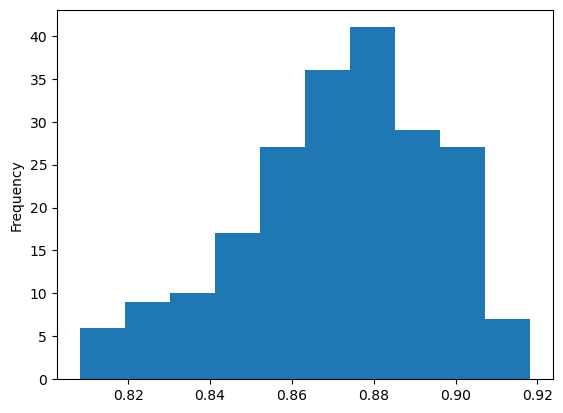

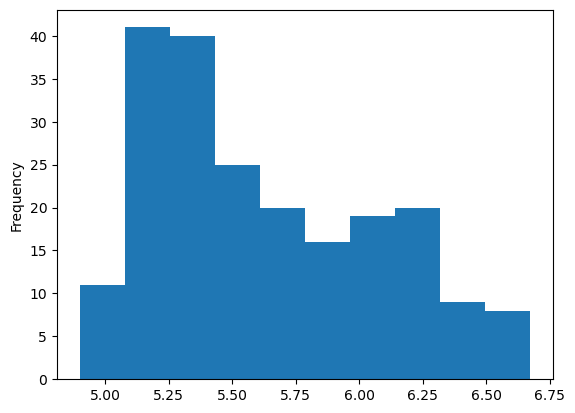

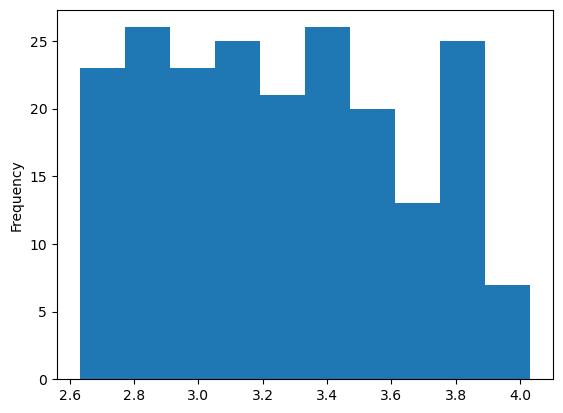

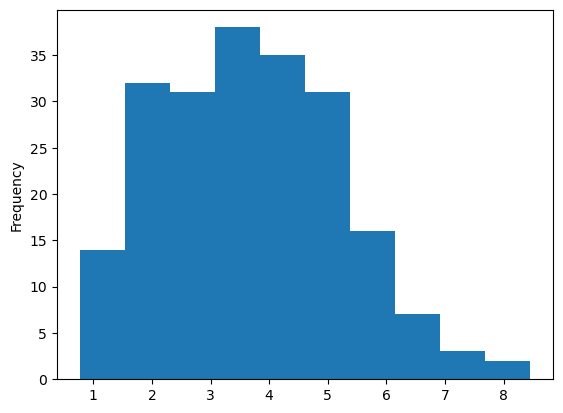

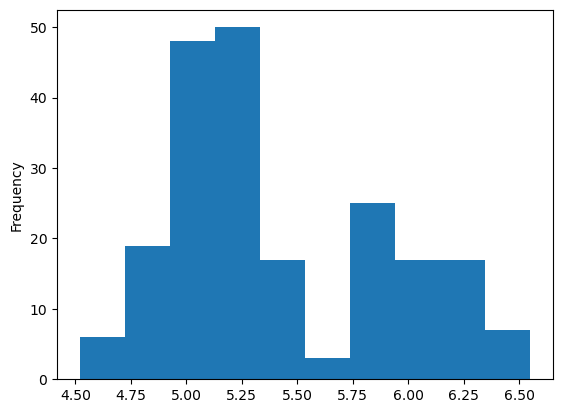

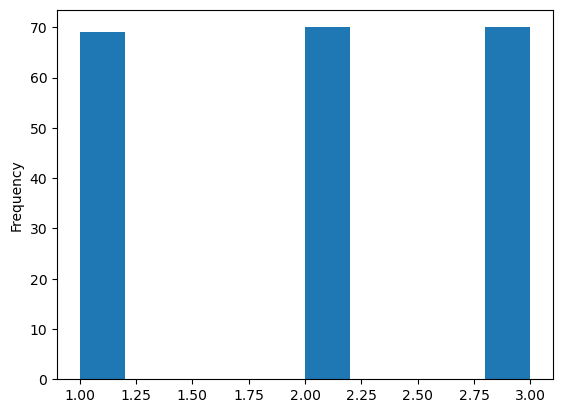

In [28]:
cols = df.columns
for col in cols:
    df[col].plot(kind='hist')
    plt.show()

In [33]:
import pickle as pkl


In [35]:
filename = 'model.pkl'
pkl.dump(rf, open(filename, 'wb'))

In [36]:
ls

 model.pkl   seeds_dataset.txt  'wheat classification.ipynb'   wheat.csv
